<a href="https://colab.research.google.com/github/nkanungo/EVA6/blob/main/MNIST_Pytorch_S4_Relu_BN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import all the required Libraries 

In [ ]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

# Define the Network

Typical Structure 
=====================
1. Convolution Layer of 3 x 3 Kernel with Padding of 1 
2. ReLu
3. Batch Normalization  - Regularization Technique 
4. Dropout              - Regularization Technique 
5. Maxpool after 3 Layers 

Additional Structures
======================
1. Convolution Layer of 1 x 1 Kernel to consolidate without convolution 
2. Global Average Pooling 
3. Linear Layer 

Special Considerations
========================
1. The Maxpool layers are placed such a way that the receptive field is 7 x 7 or 9 x9 (Ideally for imagenet type of images 11 x 11 is better) . But MNIST is a easy dataset so 7 x 7 should be good enough

2. No ReLu, BN or Dropout towards the end of the netowrk (Target prediction zone)

3. As less parameter as possible (near to the lower limit of 12000)
4. Dropout of 0.069 - As asked
5. Rotation of -5% - 5 %
6. Normalization
7. Batch size of 128 



In [ ]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        dropout_prob=0.069
        self.conv1 = nn.Sequential(
            nn.Conv2d(1, 8, 3, padding=1, bias=False),
            nn.ReLU(),
            nn.BatchNorm2d(8),
            nn.Dropout2d(p=dropout_prob)
        )
        self.conv2 = nn.Sequential(
            nn.Conv2d(8, 16, 3, padding=1, bias=False),
            nn.ReLU(),
            nn.BatchNorm2d(16),
            nn.Dropout2d(p=dropout_prob)
        )

        self.pool1= nn.MaxPool2d(2, 2)

        self.conv3 = nn.Sequential(
            nn.Conv2d(16, 24, 3, padding=1, bias=False),
            nn.ReLU(),
            nn.BatchNorm2d(24),
            nn.Dropout2d(p=dropout_prob)
        )
        self.conv4 = nn.Sequential(
            nn.Conv2d(24, 16, 3, padding=1, bias=False),
            nn.ReLU(),
            nn.BatchNorm2d(16),
            nn.Dropout2d(p=dropout_prob)
        )

        self.pool2= nn.MaxPool2d(2, 2)

        self.conv5 = nn.Sequential(
            nn.Conv2d(16, 16, 3, padding=0, bias=False),
            nn.Conv2d(16, 14, 1, bias=False),
            nn.ReLU(),
            nn.BatchNorm2d(14),
            nn.Dropout2d(p=dropout_prob)
        )


       
        self.conv6 = nn.Sequential(
            nn.Conv2d(14, 14, 3, padding=0, bias=False),
        )

        self.global_avgpool = nn.AdaptiveAvgPool2d(1)
        self.fc = nn.Linear(14, 10)  
      
    
    def forward(self, x):
        x = self.conv1(x)     
        x = self.conv2(x)
        x = self.pool1(x)
        x = self.conv3(x)
        x = self.conv4(x)

        x = self.pool2(x)
        x = self.conv5(x)
        x = self.conv6(x)
               
        x = self.global_avgpool(x)
        x = x.view(-1, 14)
        x = self.fc(x)
        return F.log_softmax(x)

Steps
========
1. Install Torch Summary
2. Print Summary of model

In [ ]:
!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
model = Net().to(device)
summary(model, input_size=(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 8, 28, 28]              72
              ReLU-2            [-1, 8, 28, 28]               0
       BatchNorm2d-3            [-1, 8, 28, 28]              16
         Dropout2d-4            [-1, 8, 28, 28]               0
            Conv2d-5           [-1, 16, 28, 28]           1,152
              ReLU-6           [-1, 16, 28, 28]               0
       BatchNorm2d-7           [-1, 16, 28, 28]              32
         Dropout2d-8           [-1, 16, 28, 28]               0
         MaxPool2d-9           [-1, 16, 14, 14]               0
           Conv2d-10           [-1, 24, 14, 14]           3,456
             ReLU-11           [-1, 24, 14, 14]               0
      BatchNorm2d-12           [-1, 24, 14, 14]              48
        Dropout2d-13           [-1, 24, 14, 14]               0
           Conv2d-14           [-1, 16,

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:67: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Steps
=======
This is the most important step 
1. Define Train loader and Test loader with only 1 worker (MNSIT is easy dataset)
2. Ensure that all requirements are fulfiiled
    - Random ROtation
    - Fill
    - Normalize


In [ ]:
#torch.manual_seed(1)
batch_size = 128

kwargs = {'num_workers': 1, 'pin_memory': True} if use_cuda else {}
train_loader = torch.utils.data.DataLoader(
    datasets.MNIST('../data', train=True, download=True,
                    transform=transforms.Compose([
                        transforms.RandomRotation((-5.0, 5.0), fill=(1,)),                          
                        transforms.ToTensor(),
                        transforms.Normalize((0.1307,), (0.3081,))
                    ])),
    batch_size=batch_size, shuffle=True, **kwargs)
test_loader = torch.utils.data.DataLoader(
    datasets.MNIST('../data', train=False, transform=transforms.Compose([
                        transforms.ToTensor(),
                        transforms.Normalize((0.1307,), (0.3081,))
                    ])),
    batch_size=batch_size, shuffle=True, **kwargs)


Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting ../data/MNIST/raw/train-images-idx3-ubyte.gz to ../data/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting ../data/MNIST/raw/train-labels-idx1-ubyte.gz to ../data/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting ../data/MNIST/raw/t10k-images-idx3-ubyte.gz to ../data/MNIST/raw




Extracting ../data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/MNIST/raw

Processing...
Done!


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:502: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:143.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


Steps
=======
1. Define Lists to capture training parameters and testing parameters 
2. Iterate over the training sample based on the defined batch size
3. Validate on test dataset
4. Capture outcome in the list

In [ ]:
from tqdm import tqdm

train_losses = []
test_losses = []
train_acc = []
test_acc = []

def train(model, device, train_loader, optimizer, epoch):
  model.train()
  pbar = tqdm(train_loader)
  correct = 0
  processed = 0
  loss_list = []
  acc_list = []
  for batch_idx, (data, target) in enumerate(pbar):
    # get samples
    data, target = data.to(device), target.to(device)

    # Init
    optimizer.zero_grad()
    # In PyTorch, we need to set the gradients to zero before starting to do backpropragation because PyTorch accumulates the gradients on subsequent backward passes. 
    # Because of this, when you start your training loop, ideally you should zero out the gradients so that you do the parameter update correctly.

    # Predict
    y_pred = model(data)

    # Calculate loss
    loss = F.nll_loss(y_pred, target)
    loss_list.append(loss)

    # Backpropagation
    loss.backward()
    optimizer.step()

    # Update pbar-tqdm    
    pred = y_pred.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
    correct += pred.eq(target.view_as(pred)).sum().item()
    processed += len(data)

    pbar.set_description(desc= f'Loss={loss.item()} Batch_id={batch_idx} Accuracy={100*correct/processed:0.2f}')
    acc_list.append(100*correct/processed)
  train_losses.append(sum(loss_list)/len(loss_list))
  train_acc.append(sum(acc_list)/len(acc_list))

def test(model, device, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += F.nll_loss(output, target, reduction='sum').item()  # sum up batch loss
            pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)
    test_losses.append(test_loss)
    
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.2f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))
    
    test_acc.append(100. * correct / len(test_loader.dataset))

Steps
=====
This is where the real action takes place

1. Define Learning rate and Optimizer 
2. Train for the defined epoch
3. Validate 
4. Print the result

In [ ]:
from torch.optim.lr_scheduler import StepLR

model =  Net().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
scheduler = StepLR(optimizer, step_size=6, gamma=0.1)

model = Net().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

for epoch in range(1, 20):
    print('Currently Executing Epoch:', epoch)
    
    train(model, device, train_loader, optimizer, epoch)
    test(model, device, test_loader)
    scheduler.step()

  0%|          | 0/469 [00:00<?, ?it/s]

Currently Executing Epoch: 1


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:67: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
Loss=0.06623551994562149 Batch_id=468 Accuracy=86.28: 100%|██████████| 469/469 [00:20<00:00, 23.26it/s]
/usr/local/lib/python3.7/dist-packages/torch/optim/lr_scheduler.py:134: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  "https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate", UserWarning)
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0542, Accuracy: 9828/10000 (98.28%)

Currently Executing Epoch: 2


Loss=0.07634750753641129 Batch_id=468 Accuracy=97.29: 100%|██████████| 469/469 [00:20<00:00, 23.16it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0340, Accuracy: 9883/10000 (98.83%)

Currently Executing Epoch: 3


Loss=0.03574162349104881 Batch_id=468 Accuracy=98.00: 100%|██████████| 469/469 [00:20<00:00, 22.96it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0308, Accuracy: 9896/10000 (98.96%)

Currently Executing Epoch: 4


Loss=0.021819936111569405 Batch_id=468 Accuracy=98.28: 100%|██████████| 469/469 [00:20<00:00, 23.15it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0274, Accuracy: 9911/10000 (99.11%)

Currently Executing Epoch: 5


Loss=0.04234654828906059 Batch_id=468 Accuracy=98.36: 100%|██████████| 469/469 [00:20<00:00, 23.09it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0248, Accuracy: 9914/10000 (99.14%)

Currently Executing Epoch: 6


Loss=0.052025169134140015 Batch_id=468 Accuracy=98.48: 100%|██████████| 469/469 [00:20<00:00, 22.97it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0213, Accuracy: 9916/10000 (99.16%)

Currently Executing Epoch: 7


Loss=0.009478755295276642 Batch_id=468 Accuracy=98.63: 100%|██████████| 469/469 [00:20<00:00, 23.06it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0224, Accuracy: 9921/10000 (99.21%)

Currently Executing Epoch: 8


Loss=0.05772705376148224 Batch_id=468 Accuracy=98.69: 100%|██████████| 469/469 [00:20<00:00, 22.99it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0198, Accuracy: 9929/10000 (99.29%)

Currently Executing Epoch: 9


Loss=0.01770886965095997 Batch_id=468 Accuracy=98.73: 100%|██████████| 469/469 [00:20<00:00, 23.10it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0173, Accuracy: 9944/10000 (99.44%)

Currently Executing Epoch: 10


Loss=0.058960724622011185 Batch_id=468 Accuracy=98.85: 100%|██████████| 469/469 [00:20<00:00, 22.97it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0216, Accuracy: 9929/10000 (99.29%)

Currently Executing Epoch: 11


Loss=0.06814174354076385 Batch_id=468 Accuracy=98.93: 100%|██████████| 469/469 [00:20<00:00, 22.94it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0181, Accuracy: 9942/10000 (99.42%)

Currently Executing Epoch: 12


Loss=0.08384868502616882 Batch_id=468 Accuracy=98.95: 100%|██████████| 469/469 [00:20<00:00, 23.17it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0191, Accuracy: 9943/10000 (99.43%)

Currently Executing Epoch: 13


Loss=0.035104893147945404 Batch_id=468 Accuracy=98.94: 100%|██████████| 469/469 [00:20<00:00, 22.93it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0193, Accuracy: 9931/10000 (99.31%)

Currently Executing Epoch: 14


Loss=0.006110087502747774 Batch_id=468 Accuracy=99.00: 100%|██████████| 469/469 [00:20<00:00, 23.06it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0189, Accuracy: 9935/10000 (99.35%)

Currently Executing Epoch: 15


Loss=0.005162848625332117 Batch_id=468 Accuracy=99.07: 100%|██████████| 469/469 [00:20<00:00, 22.92it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0173, Accuracy: 9936/10000 (99.36%)

Currently Executing Epoch: 16


Loss=0.007750762160867453 Batch_id=468 Accuracy=99.06: 100%|██████████| 469/469 [00:20<00:00, 22.97it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0181, Accuracy: 9942/10000 (99.42%)

Currently Executing Epoch: 17


Loss=0.060273587703704834 Batch_id=468 Accuracy=99.07: 100%|██████████| 469/469 [00:20<00:00, 23.18it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0178, Accuracy: 9942/10000 (99.42%)

Currently Executing Epoch: 18


Loss=0.019279396161437035 Batch_id=468 Accuracy=99.11: 100%|██████████| 469/469 [00:20<00:00, 22.97it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0175, Accuracy: 9941/10000 (99.41%)

Currently Executing Epoch: 19


Loss=0.011843018233776093 Batch_id=468 Accuracy=99.11: 100%|██████████| 469/469 [00:20<00:00, 22.93it/s]



Test set: Average loss: 0.0166, Accuracy: 9939/10000 (99.39%)



Steps
====
Visualization of Training and Validation Parameters
   - Loss 
   - Accuracy
   

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

def plot_loss(train_loss_list, test_loss_list):
    fig, axs = plt.subplots(figsize=(5,5))
    axs.plot(train_loss_list, label="Train Loss")
    axs.plot(test_loss_list, label="Test Loss")
    axs.legend()
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.show()

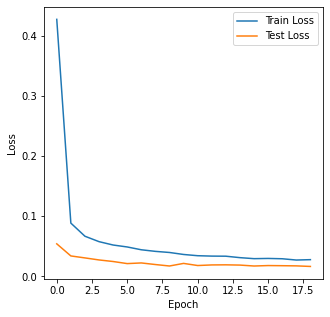

In [ ]:
plot_loss(train_losses, test_losses)

In [ ]:
def plot_accuracy(train_accuracy_list, test_accuracy_list):
    fig, axs = plt.subplots(figsize=(5,5))
    axs.plot(train_accuracy_list, label="Train Accuracy")
    axs.plot(test_accuracy_list, label="Test Accuracy")
    axs.legend()
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.show()

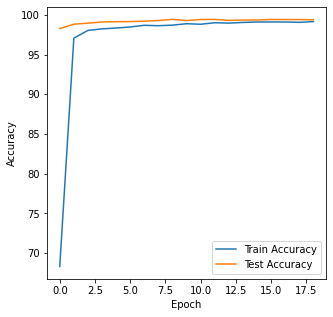

In [ ]:
plot_accuracy(train_acc, test_acc)

Summary
=========
